### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the datasets

In [2]:
train_df = pd.read_csv("../input/linear-reg-woc/Linear_train.csv")

In [3]:
test_df = pd.read_csv("../input/linear-reg-woc/Linear_test.csv")

### Creating features and Labels

In [4]:
y = train_df["label"]
y_tests = test_df["label"]
print(y.shape)
train_df.drop(train_df.columns[[0, 21]], axis=1 , inplace=True)
test_df.drop(test_df.columns[[0, 21]], axis=1 , inplace=True)

(50000,)


### Data preprocessing

In [5]:
x_train_scaled = (train_df - train_df.mean())/(train_df.std())
# x_test_scaled = (df_test - df_test.mean())/(df_test.max() - df_test.min())
x_test_scaled = (test_df - test_df.mean())/(test_df.std())
x_train = x_train_scaled.values
x_train = x_train.T
print(x_train.shape)

y_train = np.array([y])
y_train = y_train.reshape(1,50000)
print(y_train.shape)
x_test = x_test_scaled.values
x_test = x_test.T
y_test = np.array([y_tests])
y_test = y_test.reshape(1,10000)
print(y_test.shape)

(20, 50000)
(1, 50000)
(1, 10000)


#### Activation function 

In [6]:
from sklearn.metrics import mean_squared_error

def identity(z):
    
    return z


def derivative_identity(x):
    return np.ones(x.shape)

### Neural networks class

In [7]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = identity(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = identity(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache


def cost_function(a2, y):
    m = y.shape[1]
    
    cost = (1/(2*m))*np.sum( np.square(y-a2))
    
    
    return cost

def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/(m))*np.dot(dz2, a1.T)
    db2 = (1/(m))*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_identity(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list









In [8]:
n_h = 17                                                      #set layer sizes, do not change the size of the first and last layer 
num_iters = 1000                                                             #set number of iterations over the training set(also known as epochs in batch gradient descent context)
learning_rate = 0.001
#set learning rate for gradient descent


In [9]:
Parameters, Cost_list = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = num_iters)

Cost after 0 iterations is : 13399442.838958502
Cost after 100 iterations is : 1314087.6173856817
Cost after 200 iterations is : 32960.805461593685
Cost after 300 iterations is : 2680.6041787210543
Cost after 400 iterations is : 1927.5438308756875
Cost after 500 iterations is : 1907.6590711934803
Cost after 600 iterations is : 1907.114477147982
Cost after 700 iterations is : 1907.0991310807676
Cost after 800 iterations is : 1907.098687336046
Cost after 900 iterations is : 1907.098674189982


### Plotting cost function

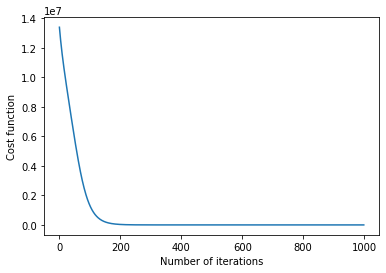

In [10]:
plt.plot(Cost_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.show()

In [11]:
def predict(x_test, parameters):
    forward_cache = forward_propagation(x_test, parameters)
    return forward_cache["a2"]

### Calculating accuracy on test set

In [12]:
y_pred = predict(x_test, Parameters)

In [13]:
y_pred.shape

(1, 10000)

In [14]:
y_test.shape

(1, 10000)

In [15]:
def accuracy(y_test, y_pred):
    return np.sqrt((np.square(y_test - y_pred)).mean())
print("Rmse error on test dataset = ", accuracy(y_test, y_pred))

Rmse error on test dataset =  74.71079225459114
